## **Inteligencia Artificial y Aprendizaje Automático**

## **Carlos Alvarez**

### Prof Luis Eduardo Falcón Morales


### **Problema de asignación de créditos: South German Dataset.**


# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
# Si queremos asegurar que en la partición los niveles de las categóricas queden estratificados lo mejor posible:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


In [2]:
# Si se desean comentar algunos de los Warnings.
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Carga y renombra los nombres de las columnas del alemán al inglés y desplegamos
# de nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************


path = '/content/drive/MyDrive/Colab Notebooks/MNA_TEC_DE_MONTERREY/Inteligencia Artificial y Aprendizaje Automatico_TC4030/Modulo 3/Actividad 5/SouthGermanCredit.asc'
df = pd.read_csv(path, sep=' ') # no tienen nombre las columnas

df.rename(columns={'laufkont': 'status', 'laufzeit': 'duration', 'moral': 'credit_history', 'verw': 'purpose', 'hoehe': 'amount',
'sparkont': 'savings', 'beszeit': 'employment_duration', 'rate': 'installment_rate', 'famges': 'personal_status_sex', 'buerge': 'other_debtors',
'wohnzeit': 'present_residence', 'verm': 'property', 'alter': 'age', 'weitkred': 'other_installment_plans', 'wohn': 'housing', 'bishkred': 'number_credits',
'beruf': 'job', 'pers': 'people_liable', 'telef': 'telephone', 'gastarb': 'foreign_worker', 'kredit': 'credit_risk'}, inplace=True)


# *********** Aquí termina la sección de agregar código *************

df.head().T

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/MNA_TEC_DE_MONTERREY/Inteligencia Artificial y Aprendizaje Automatico_TC4030/Modulo 3/Actividad 5/SouthGermanCredit.asc'

## **Ejercicio 2**

In [ ]:
# Realiza a continuación una transformación para que la clase negativa (buen cliente)
# quede con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************

df.credit_risk = df.credit_risk.apply(lambda v: 1 if v == 0 else 0)



# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


## **Ejercicio 3**

In [ ]:
# Realiza una partición solicitada de entrenamiento y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************


# Particionamos los datos de entrada (X) y de salida (y):
X,y = df.iloc[:,:-1], df.iloc[:,-1]
#Se considera la partición como la del artículo: 70:30
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, stratify=y, shuffle=True, random_state=1)

# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = ytrain.sum()/ytrain.shape[0]
print("\nPorcentaje clases Positiva:%.2f%%, y Negativa:%.2f%%" % (tmp*100, 100*(1-tmp)))


Dimensiones:
Entrenamiento: (700, 20) (700,)
Prueba: (300, 20) (300,)

Porcentaje clases Positiva:30.00%, y Negativa:70.00%


### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**



### ++++++++ Inicia la sección de agregar texto: +++++++++++

En general no hay una métrica definida para establecer un desbalanceo o no entre clases de la variable de salida. Sin embargo, para efectos de crear modelos robustos, se puede decir que una variable esta desbalanceada cuando el numero de instancias de sus clases no es igual y en estos casos lo conveniente es aplicar metodos de sobre y submuestreo para balancear las clases.

Referencia:

Mohammed, A., & Wang, G. (2020). Risk management framework for cloud-centric IoT systems: A domain-specific language approach. 2020 IEEE International Conference on Systems, Man, and Cybernetics (SMC), 1740-1745. https://doi.org/10.1109/SMC42975.2020.9239944

### ++++++++ Termina la sección de agregar texto: +++++++++++



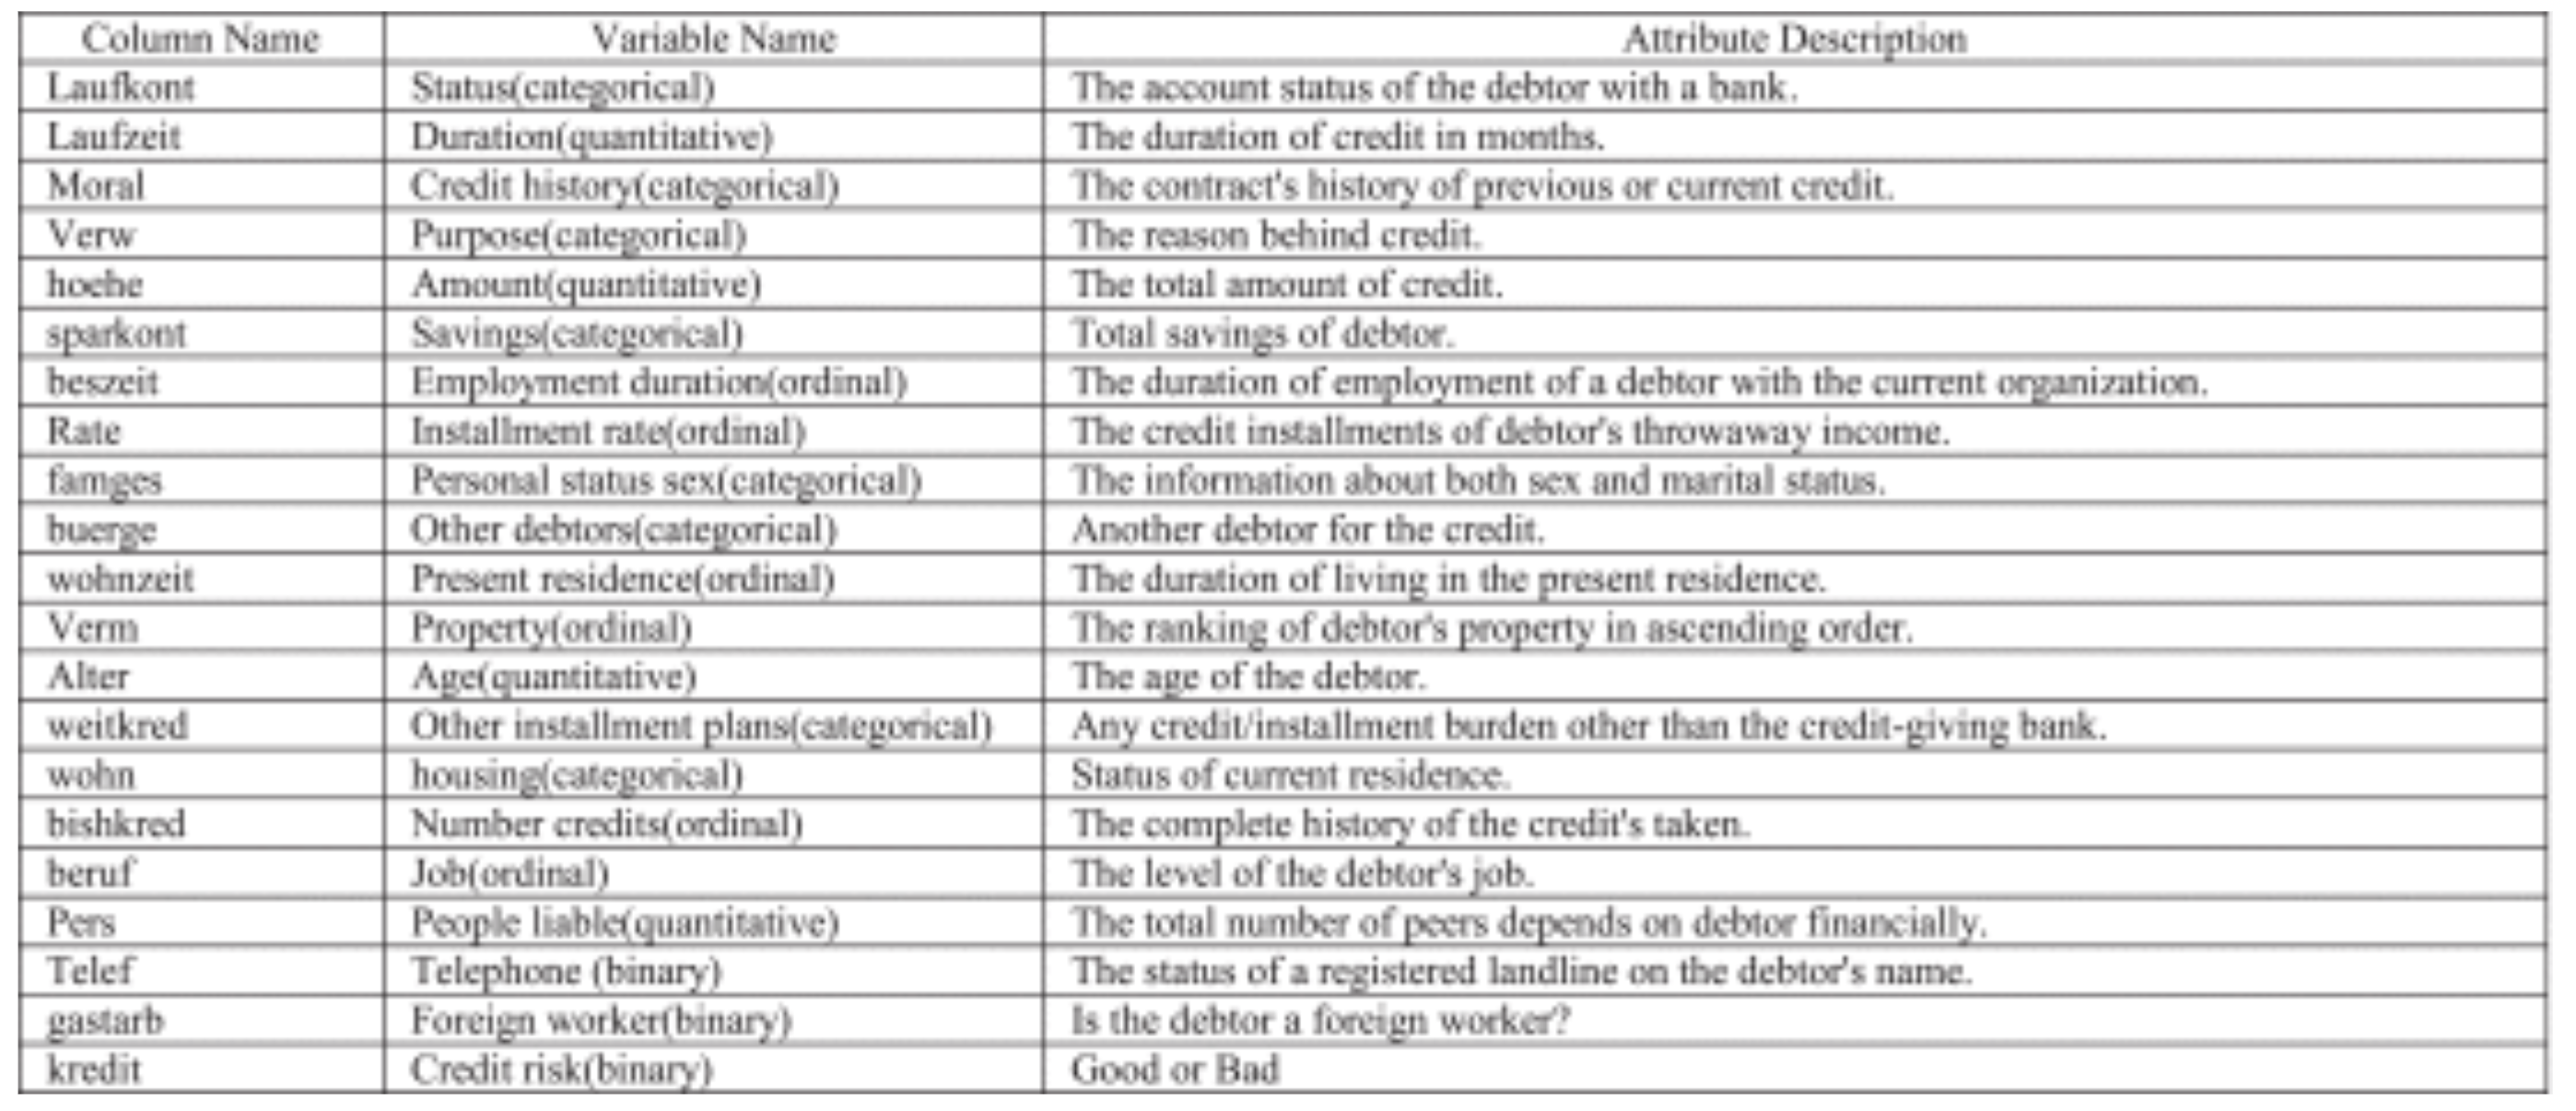

## ++++++++ Inicia la sección de agregar texto: +++++++++++

Distribución de Clases: Tienes un 70% de clientes malos (1) y un 30% de clientes buenos (0). Esto significa que hay una sobreabundancia de un tipo de clase (malos clientes) en comparación con la otra (buenos clientes).

Deacuerdo a lo anterior se podria ver sesgado el modelo, ya que el modelo va a predecir la clase mayoritaria(malos clientes) y tener un rendimiento deficiente en la clase minoritaria (buenos clientes).


### ++++++++ Termina la sección de agregar texto: +++++++++++


## **Ejercicio 4**

In [ ]:
# De acuerdo a la información de la Tabla 3 del artículo de la IEEE
# define las variables correspondientes que se indican a continuación:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
lista_paper_num = ['duration', 'amount', 'age','people_liable']


# Variables ordinales:
lista_paper_ord = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job', ]


# Variables nominales:
lista_paper_cat = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing' ]


# *********** Aquí termina la sección de agregar código *************


## **Ejercicio 5**

In [ ]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
numericas_pipe = Pipeline(steps = [('impMediana', SimpleImputer(strategy='mean')),
                                   ('normalization', MinMaxScaler(feature_range=(1, 5)))])
numericas_pipe_nombres = lista_paper_num

# Variables categóricas-Nominales:
nominales_pipe = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')), #Solo en el caso de que existan valores faltantes se reemplazarn con los valores mas frecuentes para que el modelo tenga el mismo comportamiento.
                ('one-hot-encoding', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)) # Se utiliza  One-Hot para transformar a valores entre 0 y 1 con drop first para disminuir cantidad de columnas y sparse=false para tener información completa en la matriz.
                ])
nominales_pipe_nombres = lista_paper_cat

# Variables categóricas-ordinales:
ordinales_pipe = Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')), #Solo en el caso de que existan valores faltantes se reemplazarn con los valores mas frecuentes para que el modelo tenga el mismo comportamiento.
                ('ordinal', OrdinalEncoder()) #Se emplea ordinal encoder para transformar las etiquetas a valores numéricos discretos, las variables tienen relacion de orden entre ellas por lo que la tranformacion ordinal encoder nos dará la mejor representación numérica.
                ])
ordinales_pipe_nombres = lista_paper_ord



# Conjuntas las transformaciones de todo tipo de variable y
# deja sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(transformers = [('numpipe', numericas_pipe, lista_paper_num),
                                                        ('ordpipe', ordinales_pipe, lista_paper_ord),
                                                        ('nompipe', nominales_pipe, lista_paper_cat)],
                                        remainder='passthrough')



# *********** Aquí termina la sección de agregar código *************


## **Ejercicio 6**

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y prueba
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:


# ************* Inlcuye aquí tu código:**************************

Xtraintest = pd.concat([Xtrain, Xtest], ignore_index=True)
ytraintest = pd.concat([ytrain, ytest], ignore_index=True)


# *********** Aquí termina la sección de agregar código *************


# Veamos cuántas variables nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtraintest.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (1000, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (1000, 41)


## **Ejercicio 7**

In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.


def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja y no esté sobreentrenado
  # con respecto a la métrica de la exatitud (accuracy).


  # Regresión Logística - Logistic Regression-LR:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    solver='lbfgs', max_iter=2000, # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1 ))
  nombres.append('LR')




  # k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

  modelos.append(KNeighborsClassifier(n_neighbors=10,       # Considera los 5 vecinos más cercanos
                           #weights='distance',  # Vecinos más cercanos tienen mayor peso
                           #algorithm='auto',    # Deja que el algoritmo escoja la mejor estrategia
                           p=2,                 # Distancia euclidiana (p=2)
                           n_jobs=-1))
  nombres.append('kNN')




  # Árbol de decisiones-DecisionTree-DT:
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

  modelos.append(DecisionTreeClassifier(criterion='gini',
                                          max_depth=6,
                                          min_samples_split=8,
                                          min_samples_leaf=5,
                                          ccp_alpha=0.005,  # Ajustar este valor para podar el árbol
                                          random_state=42))
  nombres.append('DTree')




  # Bosque Aleatorio-RandomForest-RF:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  modelos.append(RandomForestClassifier(n_estimators= 100,    # 100
                                         max_depth= 4,      # None, 1, 2,3, 4, 5, 6 ... ¿Se esperaría la misma profunidad en un RF y en un DT?
                                         min_samples_split=2,    # 2, 5, 15
                                         random_state=1 ))
  nombres.append('RF')




  # XGBoosting:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html

  modelos.append(XGBClassifier(booster= 'gbtree',
                              n_estimators=200,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                              max_depth= 6,             # 1,3, 6,
                              learning_rate=0.3,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                              subsample=0.8,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                              random_state=5,
                              objective='binary:logistic', #especifica que el problema es de clasificación binaria (dos clases
                              n_jobs=-1,
                              reg_alpha=25, reg_lambda=3.0))
  nombres.append('XGBoost')




  # Red neuronal de Perceptrón Multicapa-MLP:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

  modelos.append(MLPClassifier( hidden_layer_sizes=(30,),     # 100,  6, 24, 30, (15,15), (50,50)
                                activation='logistic',
                                max_iter=1000,                  # 200,
                                alpha=0.06,                     # término de regularización L2.
                                learning_rate='adaptive',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                                learning_rate_init=0.001,
                                random_state=1 ))
  nombres.append('MLP')




  # Máquina de Vectores de Soporte-SVM:
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

  modelos.append(SVC(kernel='rbf',
                      C= 1.7,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                      gamma= 'scale',           # scale,  0.005
                      #class_weight='balanced',     # Siempre puedes hacer uso del balanceo en caso de que ayude.
                      random_state=7 ))
  nombres.append('SVM')

  return modelos, nombres


# Técnica de submuestreo (undersampling) y/o sobremuestreo (versampling) utilizada:
mi_uoSampling = KMeansSMOTE(random_state=5, n_jobs=-1)

Xtv_uo, ytv_uo = mi_uoSampling.fit_resample(Xtraintest, ytraintest)



# *********** Aquí termina la sección de agregar código *******************





# Entrenamos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

bestGmean = 0  #Para calcular el mejor Gmean
bestModel = 0 #Para calcular el mejor Gmean
bestName = ''

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = {'miaccuracy':'accuracy','miprecision':'precision','mirecall':'recall',
                 'mifi':'f1','miauc':'roc_auc','migmean':make_scorer(geometric_mean_score)}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtv_uo,
                          ytv_uo,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))
      if bestGmean < np.mean(scores['test_migmean']):
         bestGmean = np.mean(scores['test_migmean'])
         bestModel = i
         bestName = nombres[i]


>> LR
	 test_miaccuracy 0.817 (0.028)
	 train_miaccuracy 0.833 (0.007)
	 test_miprecision 0.821 (0.035)
	 train_miprecision 0.840 (0.010)
	 test_mirecall 0.813 (0.035)
	 train_mirecall 0.823 (0.009)
	 test_mifi 0.816 (0.028)
	 train_mifi 0.831 (0.007)
	 test_miauc 0.902 (0.021)
	 train_miauc 0.921 (0.005)
	 test_migmean 0.817 (0.028)
	 train_migmean 0.833 (0.007)
>> kNN
	 test_miaccuracy 0.807 (0.026)
	 train_miaccuracy 0.835 (0.006)
	 test_miprecision 0.871 (0.027)
	 train_miprecision 0.901 (0.008)
	 test_mirecall 0.722 (0.044)
	 train_mirecall 0.753 (0.011)
	 test_mifi 0.789 (0.032)
	 train_mifi 0.820 (0.007)
	 test_miauc 0.876 (0.023)
	 train_miauc 0.921 (0.005)
	 test_migmean 0.802 (0.028)
	 train_migmean 0.831 (0.006)
>> DTree
	 test_miaccuracy 0.792 (0.019)
	 train_miaccuracy 0.819 (0.013)
	 test_miprecision 0.871 (0.055)
	 train_miprecision 0.898 (0.052)
	 test_mirecall 0.696 (0.080)
	 train_mirecall 0.727 (0.063)
	 test_mifi 0.768 (0.035)
	 train_mifi 0.799 (0.024)
	 test_miauc

In [ ]:
#Imprimiendo los resultados del mejor modelo
print(f'Mejor Modelo: {bestName}')
scores = resultados[bestModel]
for j,k in enumerate(list(scores.keys())):
  if j>1:
   print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

Mejor Modelo: SVM
	 test_miaccuracy 0.823 (0.029)
	 train_miaccuracy 0.852 (0.006)
	 test_miprecision 0.884 (0.029)
	 train_miprecision 0.916 (0.007)
	 test_mirecall 0.744 (0.046)
	 train_mirecall 0.774 (0.014)
	 test_mifi 0.808 (0.034)
	 train_mifi 0.839 (0.008)
	 test_miauc 0.903 (0.020)
	 train_miauc 0.932 (0.004)
	 test_migmean 0.819 (0.030)
	 train_migmean 0.848 (0.007)


In [ ]:
# promedios de las métricas solicitadas para los datos de prueba
accuracy = np.mean(scores['test_miaccuracy']) * 100  # En porcentaje
precision = np.mean(scores['test_miprecision']) * 100  # En porcentaje
recall = np.mean(scores['test_mirecall']) * 100  # En porcentaje
f1 = np.mean(scores['test_mifi']) * 100  # En porcentaje
roc_auc = np.mean(scores['test_miauc'])  # ROC AUC
gmean = np.mean(scores['test_migmean'])  # G-mean

# diccionario con los resultados
results = {
    'Accuracy %': accuracy,
    'Precision %': precision,
    'Recall %': recall,
    'F1 %': f1,
    'ROC_AUC': roc_auc,
    'G-mean': gmean
}

# Convertir los resultados a un DataFrame con un solo renglón
df_results = pd.DataFrame([results])

print(f'Mejor modelo con los valores de hiperparámetros encontrado: {bestName}')
print()
print('Técnica de submuestreo o sobremuestreo utilizada en caso de que se haya utilizado: KMeansSMOTE')
print()
# Mostrar el DataFrame
print(df_results)

Mejor modelo con los valores de hiperparámetros encontrado: SVM

Técnica de submuestreo o sobremuestreo utilizada en caso de que se haya utilizado: KMeansSMOTE

   Accuracy %  Precision %   Recall %       F1 %   ROC_AUC    G-mean
0   82.322827    88.433322  74.421142  80.761821  0.903166  0.819103


## **Ejercicio 8**

### **Escribe tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Al inició del ejercicio se procedió conforme a lo indicado encontrandose en la mayória de los puntos un proceso estandar y lógico, sin embargo se decidió que para el tratamiento de las variables numericas en el escalamiento se utilizara un rango de 1 a 5 para que dichas variables no perdieran peso frente a las variables ordinales las cuales tenían hasta 5 categorías, fuera de esto se consideró el resto del proceso de manera normal.

Después de generar hiperparámetros de entrada en los modelos se pudo observar al inicio de las ejecuciones de validación cruzada que varios modelos tenían valores de G-Mean en el conjunto de entrenamiento de hasta 100% mientras que en el conjunto de prueba encontramos valores por debajo del 70%, lo que indicaba un claro caso de 'overfitting'. Para corregir lo anterior se utilizaron los hiperparámetros correspondientes para penalizar al modelo y así evitar el sobre ajuste como es el caso de las lambda, alpha, c, etc.. En el caso del Decision three y Random Forest se limitó la profundidad de los árboles. Esta penalización o limitación del sobreajuste lograba una generalización del modelo que permitia tener mejor desempeño en las predicciones de los conjuntos de prueba.

Una vez que el tema del sobreajuste se eliminó se procedió a encontrar la mejor técnica de muestreo para evitar el problema del desbalanceo entre clases, después de probar diferentes técnicas de oversampling y undersampling se encontró que el KmeansSmote tiene el mejor desempeño tanto en accuracy como en Gmean, lo que coincidió con el resultado de la mejor técnica en el artículo.

Una vez detectado la mejor técnica de muestreo se realizó ajuste fino de los hiperparámetros en los modelos para lograr el mejor desempeño cuidando que no se produjera overfitting obteniendo el mejor resultado con el modelo SVM.

Se evidencia que el mejor modelo es el SMV ya que cada una de las metricas no hay mucha diferencia entre el conjunto se entrenamiento y el conjunto de test, con lo cual se puede suponer que no hay sobreajuste.
Basandome en el conjunto de prueba:
Accuracy: 0.823 nos deja ver que el modelo acierta aproximadamente el 82% de las veces.
Precision: 0.884 nos menciona que el modelo predice una clase positiva, lo hace correctamente el 88,4% de las veces.
Recall: 0.744 estima que el modelo es capaz de identificar el 74,4% de los casos positivos reales.
F1: 0.808 representa el equilibrio entre precisión y recall. Un valor alto indica que el modelo es eficiente en ambas métricas.
Auc: 0.903 indicar que el 90,3% el modelo puede diferenciar entre las clases positivas y negativas.

Es el mejor modelo ya que se evidencia una precisión del 88,4% y un recall del 74.4% sobre el conjunto de prueba. El modelo indica que es efectivo en identificar la mayoría de los casos positivo.



### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ### **Fin de la Actividad de las Semanas 5 y 6.**